In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
adverstising=pd.read_csv('Advertising.csv')

In [3]:
adverstising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
adverstising.shape

(200, 5)

In [7]:
adverstising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
adverstising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


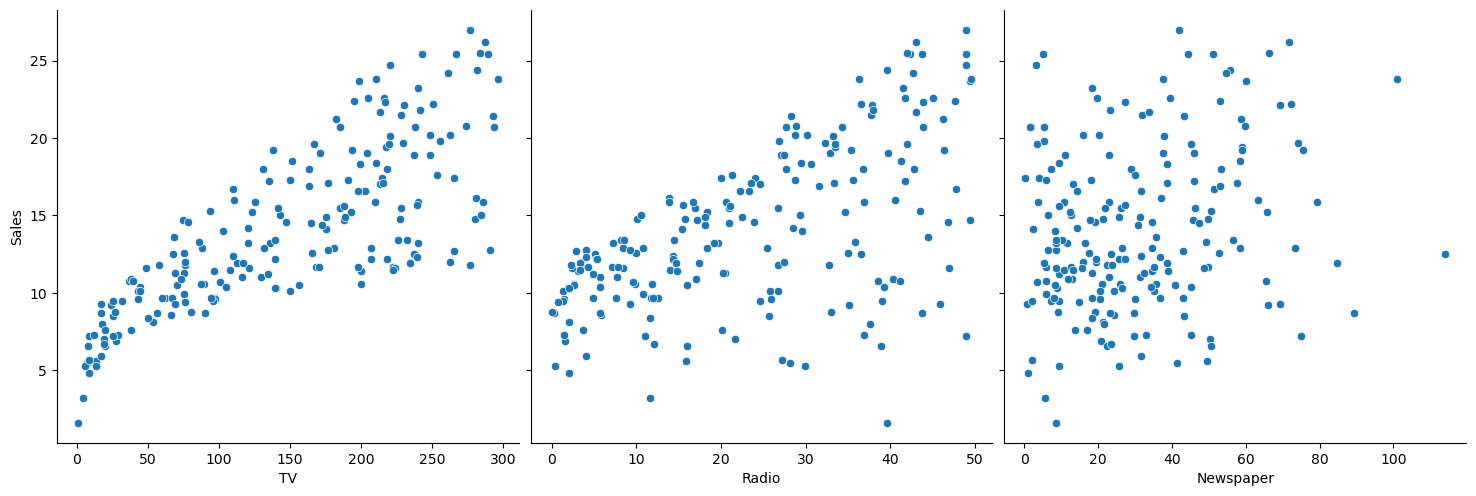

In [10]:
#Visualisation
sns.pairplot(adverstising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

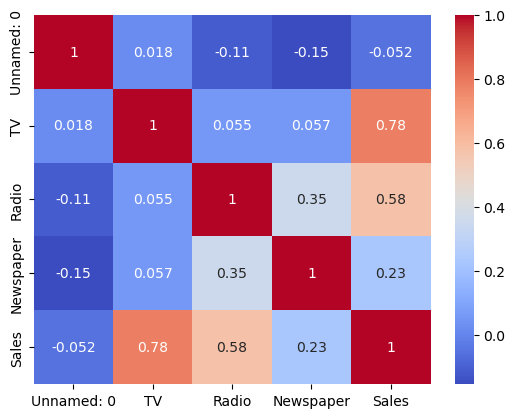

In [12]:
sns.heatmap(adverstising.corr(), cmap = "coolwarm", annot = True)
plt.show()

In [5]:
x=adverstising['TV']
y=adverstising['Sales']

In [6]:
#Splitting the data into Train and Test (with split ratio = 70-30) 43% 34% 23.9988782723148761348%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [10]:
X_train =X_train.values.reshape(-1,1)
X_test =X_test.values.reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  # initialize the object 'lm'
lm.fit(X_train, y_train)  # in sklearn wherever you see .fit() method -> it means training process has started.


LinearRegression()

In [23]:
print(lm.intercept_)  # attribute  # c

6.745302251222065


In [24]:
print(lm.coef_)  # slope m

[0.05024351]


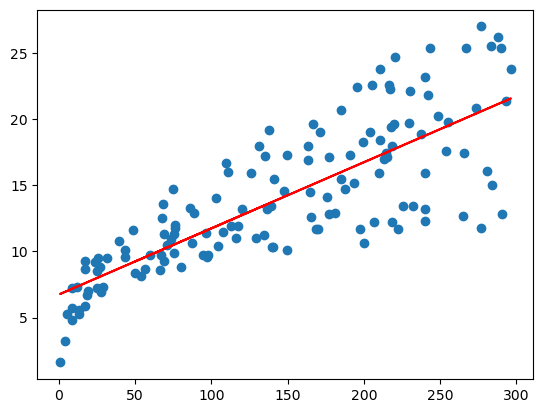

In [25]:
#Visualize the regression line - best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.74 + 0.050 * X_train, 'r')
plt.show()

In [26]:
y_train_pred = lm.predict(X_train)

res = (y_train - y_train_pred)  # residual = error

Text(0, 0.5, 'freq')

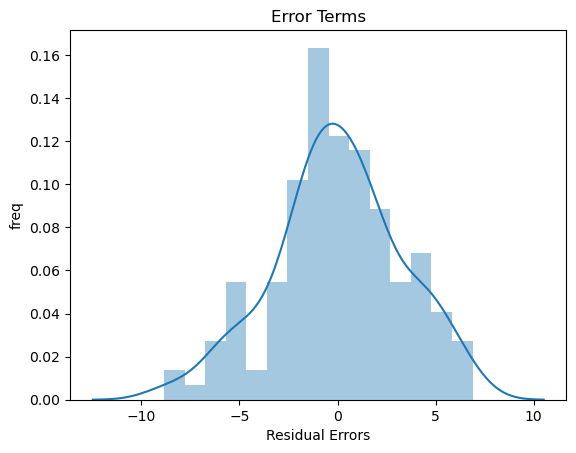

In [27]:
sns.distplot(res, bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [ ]:

y_train_pred = lm.predict(X_train)


In [37]:
from sklearn.metrics import r2_score  # metrics is a dedicated sub package in sklearn to evaluate your models
r2=r2_score(y_train, y_train_pred)
print(r2_score(y_train, y_train_pred))
n = len(y_train)  # number of observations

n_features = X_train.shape[1]  # number of features used in the model
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
print(adjusted_r2)

0.6411433688483876
0.6385429584777238


In [32]:
n_features = y_train.shape[1]  # number of features used in the model


IndexError: tuple index out of range

In [34]:
adjusted_r2 = 1 - (1 - r2_score) * (n - 1) / (n - n_features - 1)
print(adjusted_r2)

TypeError: unsupported operand type(s) for -: 'int' and 'function'

In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


In [15]:
x_train =x_train.values.reshape(-1,1)
x_test =x_test.values.reshape(-1,1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [8]:
lasso_model = Lasso(alpha=1.0, random_state=5)

In [16]:
lasso_model.fit(x_train, y_train)


Lasso(random_state=5)

In [17]:
y_train_pred = lasso_model.predict(X_train)

In [18]:
print(r2_score(y_train, y_train_pred))

0.6411387469580142


In [20]:
print(lasso_model.intercept_)

6.764642492457262
